In [1]:
import numpy as np
from matplotlib import pyplot as plt
import matplotlib
from scipy.interpolate import make_interp_spline, BSpline

In [2]:
def sort(lst, sort_by_y=False):
    if len(lst)==3:
        x, y, err = lst
    elif len(lst)==2:
        x, y = lst
        
    if not sort_by_y:
        p = x.argsort()
    else:
        p = y.argsort()
    x=x[p]
    y=y[p]
    if len(lst)==3:
        err=err[p]
    
    if len(lst)==3:
        return (x,y,err)
    elif len(lst)==2:
        return (x,y)

In [3]:
def make_interp(x,y):
    x,y = sort([x,y])
    x_new = np.linspace(x.min(),x.max(),300) #300 represents number of points to make between T.min and T.max
    spl = make_interp_spline(x, y, k=2) #BSpline object
    y_smooth = spl(x_new)
    return (x_new, y_smooth)

The PostScript backend does not support transparency; partially transparent artists will be rendered opaque.
The PostScript backend does not support transparency; partially transparent artists will be rendered opaque.


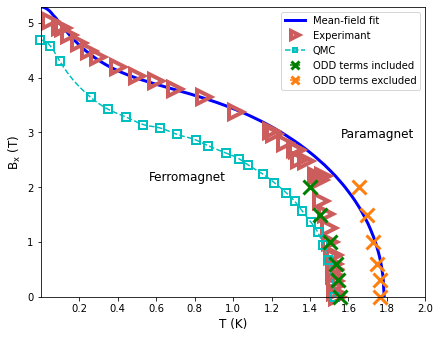

In [29]:
T, ronnow_exp = sort(np.genfromtxt(r'data\Babkevich_exp.txt',unpack=True),sort_by_y=True)
T_mf, ronnow_fit = sort(np.genfromtxt(r'data\Babkevich_mf_hf.txt',unpack=True))
Chakraborty_hf_x, Chakraborty_hf_y = sort(np.genfromtxt(r'data\Chakraborty_hf.txt',unpack=True))
plt.close()
fig=plt.figure(figsize=(6.22,4.8))



xnew = np.linspace(T_mf.min(),T_mf.max(),300) #300 represents number of points to make between T.min and T.max
spl = make_interp_spline(T_mf, ronnow_fit, k=2) #BSpline object
ronnow_fit_smooth = spl(xnew)

plt.plot(xnew,ronnow_fit_smooth,linestyle='-',mec='blue',color='blue',linewidth=3, label='Mean-field fit')


# plt.plot(xdata1,ydata1,marker='o',mec='red',mew=7,ms=17,mfc='none',linestyle='--',color='red',label='QMC, A=0',clip_on=False)
# plt.plot(xdata2,ydata2,marker='s',mec='green',mew=7,ms=17,mfc='none',linestyle='--',color='green',label='QMC, A=0.039 K',clip_on=False)

# xdata3=xdata3[np.argsort(ydata3)]
# ydata3=ydata3[np.argsort(ydata3)]
plt.plot(T,ronnow_exp,marker='>',mec='indianred',mew=4,ms=14,mfc='none',linestyle='none',label='Experimant',clip_on=False)

Chakraborty_hf_x_guide, Chakraborty_hf_y_guide = make_interp(Chakraborty_hf_x,Chakraborty_hf_y)
chakraborty_hf_plt = plt.plot(Chakraborty_hf_x_guide, Chakraborty_hf_y_guide, '--', color='c')
line=plt.plot(Chakraborty_hf_x, Chakraborty_hf_y, 's', fillstyle='none', label='QMC', mew=2,ms=8, color=chakraborty_hf_plt[0].get_color(),clip_on=False)

# res_w = np.array([[1.5896357735559457,      0.0007823866952496788,   0.0]])#,
#                     [1.5948348556760643,      0.0009278536556464894,   0.3]])

# err_w = np.array([abs(1.5730-1.5906), abs(1.5838-1.6013)])

# orange
res_w = np.array([[1.6069051173154525, 0.0004983006713807481, 0.0],
[1.6206485809047766, 0.0005474057952756362, 0.3],
[1.650679167219434, 0.0004231965483336485, 0.6],
[1.7124372826427559, 0.0005978553523697175, 1.0],
[1.7165799093338245, 0.0011931532530571904, 1.5]])
# res_w[:,1]=res_w[:,1]+err_w


# high resolution
res_w2=np.array([[1.6095746943475393,      0.00031469328299435614,   0.0],
                [1.6123243729434946,      0.0003022266972010776,  0.3],
                [1.6046000155960625, 0.0002595934444311214, 0.6],
                [1.465094707013001, 0.0002253460180816572, 1.0]])
# res_w2[:,0]-=(res_w2[0,0]-1.53)

# blue
res_w3=np.array([[1.5559052010018908, 0.000332532186120921, 0.0],
                [1.5479361637185762, 0.00029061385640320823, 0.3],
                [1.53414671227904, 0.0002879103947500188, 0.6],
                [1.5050706238379528, 0.00046136481898499595, 1.0],
                [1.4517850722328578, 0.0002808759623497347, 1.5],
                [1.400964536947133, 0.0003757495990619571, 2.0]])
#                 [1.371852924465899, 0.0, 2.0]])
# res_w3[:,0]-=(res_w3[0,0]-1.53)

# res_w4=np.array([[1.6011620453001747	,0.0005461918498444822	,0.0],
# [1.6163119756179283	,0.00027599265871497793	,0.3],
# [1.6202763124800315	,0.000265594060314523	,0.6],
# [1.5163554917334752	,0.0001737114158161672	,1.0]])
# res_w4[:,0]+=1.785-res_w4[0,0]
# res_w3=np.array([[1.598556113622166,       0.00027410761317295403,  0.0],
# [1.6102343132503014,      0.0011589216411341736,   0.3]])
# res_w=res_w[:1,:]


# err_wo = np.array([abs(1.7565-1.7748),abs(1.7522-1.7706)])
#res_wo=np.array([[1.7710618253145525  ,    0.0008842842436104495 ,  0.0]])

# low resolution
# const, RE (purple)
res_wo = np.array([[1.7625984018956593, 0.00032307959943023113, 0.0],
                    [1.7618809387654968, 0.00027637512067920614, 0.3],
                    [1.749895194057172, 0.0003250831259745088, 0.6],
                    [1.729067592486048, 0.0003512690046853762, 1.0],
                    [1.696821594067994, 0.00036820610646323226, 1.5],
                    [1.656074020255413, 0.000365283517175688, 2.0]])
# res_wo[:,0]=res_wo[:,0]-(res_wo[0,0]-1.53)


# res_wo=res_wo[:1,:]
# RE, green
res_wo2=np.array([[1.7789605957540708, 0.0005370115547893015, 0.0],
[1.7715990165059772, 0.000488596865688227, 0.3],
[1.745116652033655, 0.00045026229569749784, 0.6],
[1.7166435309241561, 0.0004234039992550881, 1.0],
[1.6444251119301547, 0.0004912868536126907, 1.5]])

# res_wo2[:,0]-=(res_wo2[0,0]-1.78)

# no hf, Jex=3.91 mK, w/o mechanism, correlation length
# res_wo3=np.array([[1.4988790004609924, 0.0003983600158171956,   0.0],
#                 [1.494424348522411, 0.0003311402896737392,  0.3],
#                 [1.4714824036625902, 0.0003581439736793368, 0.6],
#                 [1.4360145794371435, 0.00030310868595455115, 1.0],
#                  [1.2836934353003933, 0.0005288678592511636, 1.5]])
# no hf, Jex=3.91 mK, w/o mechanism, binder ratio
res_wo3=np.array([[1.498864061790089, 0.00037166842364683416, 0.0],
[1.4944104277839625, 0.00033018788361156474, 0.3],
[1.4714773477030105, 0.00037108039024139235, 0.6],
[1.4360096095906807, 0.00030259095277027683, 1.0],
[1.283019797676367, 0.0002749942145815625, 1.5]])

# red
res_wo4=np.array([[1.5096135538920437, 0.0005109413850920518, 0.0],
[1.5073050811041786, 0.000445658320260803, 0.3],
[1.4814976304405443, 0.0004110096135758716, 0.6],
[1.4497300158513422, 0.0005158071024299779, 1.0],
[1.2569411136094195, 0.00033478958949719514, 1.5]])


# res_wo3[:,0]-=(res_wo3[0,0]-1.53)

# res_wo3=np.array([[1.7656518463701467,      0.0002513015968277124,   0.0],
# [1.760359528406629,       0.00028904161751854506,  0.3]])
# res_wo[:,0]-=(res_wo[0,0]-1.53)

# res_wo=np.array([[1.4829197621077568, 0.0007441737371175439, 1.0],
#                 [1.4820628657900754, 0.0023836597659480014, 1.5]])
# res_wo[:,0]-=(res_wo4[0,0]-1.53)


# line1=plt.errorbar(res_w[:,0],res_w[:,2],xerr=res_w[:,1],marker='x',linestyle='none', ms=17, mew=4, label='ODD terms included ($J_{ex}=1.16$ mK), L=5,6,7', clip_on=False)
# line3=plt.errorbar(res_wo2[:,0],res_wo2[:,2],xerr=res_wo2[:,1],marker='x',linestyle='none', mew=4,ms=17, label='ODD terms excluded ($J_{ex}=1.16$ mK), L=5,6,7', clip_on=False)
# line4=plt.errorbar(res_w2[:,0],res_w2[:,2],xerr=res_w2[:,1],marker='x',linestyle='none', mew=4,ms=17, label='with ODD (hf, integrated exchange)', clip_on=False)
# line5=plt.errorbar(res_wo3[:,0],res_wo3[:,2],xerr=res_wo3[:,1],marker='x',linestyle='none', mew=4,ms=17, label='ODD terms excluded ($J_{ex}=3.91$ mK), L=4,5,6', clip_on=False)
line6=plt.errorbar(res_w3[:,0],res_w3[:,2],xerr=res_w3[:,1],marker='x',linestyle='none', mew=3,ms=14, label='ODD terms included', clip_on=False, color='green')
# line7=plt.errorbar(res_w4[:,0],res_w4[:,2],xerr=res_w4[:,1],marker='x',linestyle='none', mew=4,ms=17, label='ODD terms included (with hf)', clip_on=False)
# plt.errorbar(res_wo4[:,0],res_wo4[:,2],xerr=res_wo4[:,1],marker='x',linestyle='none', mew=4,ms=17, label='ODD terms excluded ($J_{ex}=3.91$ mK), L=5,6,7', clip_on=False)
plt.errorbar(res_wo[:,0],res_wo[:,2],xerr=res_wo[:,1],marker='x',linestyle='none', mew=3,ms=14, label='ODD terms excluded', clip_on=False)

# wide range
# plt.errorbar(1.7043744200209408, 1.5, xerr=0.001898733183112991, marker='x', linestyle='none',mew=4,ms=17,label='wide temperature range')

plt.ylabel(r'$\mathrm{B_x}$ (T)',fontsize=12)
plt.xlabel(r'T (K)',fontsize=12)
lgnd=plt.legend(markerscale=0.6,prop={'size': 10})
lgnd.legendHandles[2].set_linestyle('--')
# print(list(lgnd.legendHandles))
# for i in range(len(list(lgnd.legendHandles))):
#     try:
#         lgnd.legendHandles[i]._legmarker.set_markersize(10)
#         lgnd.legendHandles[i]._legmarker.set_mew(3)
#     except:
#         print(lgnd.legendHandles[i].findobj())
#         lgnd.legendHandles[i]._legmarker.set_markersize(10)
# #         lgnd.legendHandles[i].get_children()[0]._legmarker.set_mew(3)


ax=plt.gca()
from matplotlib.ticker import MaxNLocator
ax.xaxis.set_major_locator(MaxNLocator(prune='lower'))
ax.tick_params(labelsize=10)
ax.set_xlim([0,2])
ax.text(0.28, 0.4, 'Ferromagnet', transform=ax.transAxes, fontsize=12)
ax.text(0.78, 0.55, 'Paramagnet', transform=ax.transAxes, fontsize=12)


plt.margins(0)
# plt.xlim(0.8,2.0)
# matplotlib.rc('xtick', labelsize=14)
# matplotlib.rc('ytick', labelsize=14) 

# inset1
# ax2 = fig.add_axes([0.37, 0.16, 0.15, 0.3])
# ax2.errorbar(res_wo2[:,0],res_wo2[:,2],xerr=res_wo2[:,1],marker='x',linestyle='none', mew=4,ms=17, label='without ODD 2', color=line3[0].get_color())
# ax2.plot(xnew,ronnow_fit_smooth,linestyle='-',mec='blue',color='blue',linewidth=5, label='Ronnow-fit')
# ax2.plot(T,ronnow_exp,marker='>',mec='indianred',mew=7,ms=17,mfc='none',linestyle='none',label='Experimantal')
# ax2.set_xlim(1.61,1.8)
# ax2.set_ylim(-0.01,2.05)

# inset2
# ax3 = fig.add_axes([0.17, 0.16, 0.15, 0.3])
# ax3.errorbar(res_wo[:,0],res_wo[:,2],xerr=res_wo[:,1],marker='x',linestyle='none', mew=4,ms=17, label='without ODD 2', color=line2[0].get_color())
# ax3.errorbar(res_wo3[:,0],res_wo3[:,2],xerr=res_wo3[:,1],marker='x',linestyle='none', mew=4,ms=17, label='without ODD 2', color=line5[0].get_color())
# ax3.errorbar(res_w3[:,0],res_w3[:,2],xerr=res_w3[:,1],marker='x',linestyle='none', mew=4,ms=17, label='with ODD 3', color=line6[0].get_color())
# # ax3.errorbar(res_w[:,0],res_w[:,2],xerr=res_w[:,1],marker='x',linestyle='none', ms=17, mew=4, label='with ODD (hf, separate exchange)', color=line1[0].get_color())
# ax3.errorbar(res_w2[:,0],res_w2[:,2],xerr=res_w2[:,1],marker='x',linestyle='none', mew=4,ms=17, label='with ODD (hf, integrated exchange)', color=line4[0].get_color())
# ax3.plot(xnew,ronnow_fit_smooth,linestyle='-',mec='blue',color='blue',linewidth=5, label='Ronnow-fit')
# ax3.plot(T,ronnow_exp,marker='>',mec='indianred',mew=7,ms=17,mfc='none',linestyle='none',label='Experimantal')
# chakraborty_hf_plt = ax3.plot(Chakraborty_hf_x_guide, Chakraborty_hf_y_guide, '--', color=line[0].get_color())
# ax3.plot(Chakraborty_hf_x, Chakraborty_hf_y, 's', fillstyle='none', label='QMC',mew=2,ms=10, color=chakraborty_hf_plt[0].get_color())
# ax3.set_xlim(1.0,1.62)
# ax3.set_ylim(-0.01,2.05)

# ax.indicate_inset_zoom(ax2)
# ax.indicate_inset_zoom(ax3)

plt.tight_layout()
# fig.savefig(r'figures\phase_diagram.svg',format='svg')
fig.savefig(r'figures\phase_diagram.eps',format='eps')
# fig.savefig(r'figures\phase_diagram.png',format='png')
plt.show()

In [5]:
%matplotlib qt

In [7]:
plt.errorbar([1.5096473938876005],[0.0],xerr=[0.000507819454289284],marker='x',linestyle='none', mew=4,ms=17, label='without ODD (high density)', clip_on=False)

<ErrorbarContainer object of 3 artists>

In [5]:
fig.savefig(r'figures\phase_diagram.pdf',format='pdf')